<div style="text-align: center;">
    <h1 style="color: green;">Anexo 13</h1>
    <h3>Proyecto 13: Analisis de Sentimiento Multiclase</h3>
    <hr/>
    <p style="text-align: right;">Mg. Luis Felipe Bustamante Narváez</p>
</div>

En este proyecto vamos a analizar unos dataset que contienen opiniones de usuarios y un análisis previo sobre dichas opiniones, si estas son positivas, negativas o neutras. El objetivo es predecir emociones o sentimientos de las personas, basado en los comentarios que dejan en redes sociales, para el ejemplo, facebook.

A diferencia del Proyecto 12, en este caso, usaremos multiclases, de tal manera que se puedan analizar más de dos sentimientos, y el proceso deje de ser binario.

## Librerías

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import itertools

## Cargamos los datos

In [3]:
path = 'data/comentarios_facebook.csv'
df = pd.read_csv(path, encoding='utf-8')

In [4]:
df

,comentario,sentimiento
0,"No afecta mi vida, pero es interesante saberlo.",neutro
1,Esto es una completa pérdida de tiempo.,negativo
2,"Buenísima recomendación, la probaré!",positivo
3,"Es un buen punto, aunque depende de la perspec...",neutro
4,Qué publicación tan aburrida y sin sentido.,negativo
...,...,...
49995,"Me encanta esta publicación, muy inspiradora!",neutro
49996,Me decepcionó mucho este contenido.,negativo
49997,"Ni bueno ni malo, simplemente un comentario más.",neutro
49998,No entiendo por qué esto está en mi feed.,negativo


<Axes: >

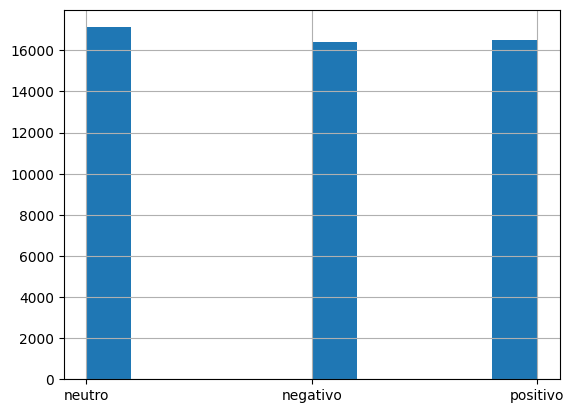

In [5]:
# histograma de sentimientos
df['sentimiento'].hist()

In [6]:
# Anexamos una columna binaria (objetivo)
target_map = {'positivo': 1, 'negativo': 0, 'neutro': 2}
df['target'] = df['sentimiento'].map(target_map)
df

,comentario,sentimiento,target
0,"No afecta mi vida, pero es interesante saberlo.",neutro,2
1,Esto es una completa pérdida de tiempo.,negativo,0
2,"Buenísima recomendación, la probaré!",positivo,1
3,"Es un buen punto, aunque depende de la perspec...",neutro,2
4,Qué publicación tan aburrida y sin sentido.,negativo,0
...,...,...,...
49995,"Me encanta esta publicación, muy inspiradora!",neutro,2
49996,Me decepcionó mucho este contenido.,negativo,0
49997,"Ni bueno ni malo, simplemente un comentario más.",neutro,2
49998,No entiendo por qué esto está en mi feed.,negativo,0


In [7]:
# Agrupamos para obtener el total de datos  (0-> negativo, 1->positivo)
grouped = df.groupby('target').count()
grouped

,comentario,sentimiento
target,,
0,16384,16384
1,16495,16495
2,17121,17121


## Procesamiento de los Datos

### Entrenamiento

In [8]:
df_train, df_test = train_test_split(df)

In [9]:
df_train

,comentario,sentimiento,target
46633,"Interesante, pero me gustaría más información.",neutro,2
14472,"Gran trabajo, sigue así!",positivo,1
19520,"Ni bueno ni malo, simplemente un comentario más.",neutro,2
1674,"Podría ser cierto, aunque hay otras opiniones.",neutro,2
27658,"Es un buen punto, aunque depende de la perspec...",positivo,1
...,...,...,...
6088,"Algunas partes son ciertas, otras no tanto.",neutro,2
24509,"Me hiciste reír, gracias por compartir!",positivo,1
32483,"Me hiciste reír, gracias por compartir!",positivo,1
42789,Me decepcionó mucho este contenido.,negativo,0


In [10]:
df_test

,comentario,sentimiento,target
1745,Tu contenido ha ido empeorando cada vez más.,negativo,0
5583,"Demasiado exagerado, no vale la pena leerlo.",negativo,0
47317,Tu contenido ha ido empeorando cada vez más.,negativo,0
457,"Malísima recomendación, no la sigan.",negativo,0
31703,Me decepcionó mucho este contenido.,negativo,0
...,...,...,...
8044,"No estoy de acuerdo para nada, pésimo argumento.",negativo,0
21421,No entiendo por qué esto está en mi feed.,negativo,0
38151,"Ni bueno ni malo, simplemente un comentario más.",neutro,2
4594,"No tiene sentido lo que dices, muy decepcionante.",negativo,0


### Vectorización

In [11]:
# usamos un máximo de 2000 dimensiones
vectorizer = TfidfVectorizer(max_features=2000)

In [12]:
# vectorizamos el entrenamiento
X_train = vectorizer.fit_transform(df_train['comentario'])
X_train

<37500x132 sparse matrix of type '<class 'numpy.float64'>'
	with 256951 stored elements in Compressed Sparse Row format>

In [13]:
X_test = vectorizer.transform(df_test['comentario'])
X_test

<12500x132 sparse matrix of type '<class 'numpy.float64'>'
	with 85272 stored elements in Compressed Sparse Row format>

In [14]:
Y_train = df_train['target']
Y_test = df_test['target']

In [15]:
len(Y_train)

37500

In [16]:
len(Y_test)

12500

## Modelo

In [17]:
model = LogisticRegression(max_iter=1000)  #Genera 1000 iteraciones cambiando los pesos/sesgos
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [46]:
# Probamos el modelo con los datos originales
train_accuracy = model.score(X_train, Y_train)
test_accuracy = model.score(X_test, Y_test)

In [47]:
# Mostramos la puntuación
print(f'El accuracy de entrenamiento es de {train_accuracy}')
print(f'El accuracy de prueba es de {test_accuracy}')

El accuracy de entrenamiento es de 0.9496533333333333
El accuracy de prueba es de 0.95104


## Predicciones

In [48]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [49]:
# Matriz de confusión
conf_matrix_train = confusion_matrix(Y_train, P_train, normalize='true')
conf_matrix_train

array([[0.9482351 , 0.0242113 , 0.0275536 ],
       [0.02537084, 0.95031207, 0.02431709],
       [0.02543424, 0.02419355, 0.95037221]])

In [50]:
conf_matrix_test = confusion_matrix(Y_test, P_test, normalize='true' )
conf_matrix_test

array([[0.94729172, 0.02477532, 0.02793296],
       [0.02164502, 0.95406445, 0.02429052],
       [0.02556213, 0.02272189, 0.95171598]])

In [51]:
# Gráfico de la matriz de confusión
def plot_conf_matrix(c_m, color):
    classes = ['negativo', 'positivo', 'neutro']
    df_cm = pd.DataFrame(c_m, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g', cmap=color)
    ax.set_xlabel('Predecido')
    ax.set_ylabel('Objetivo')

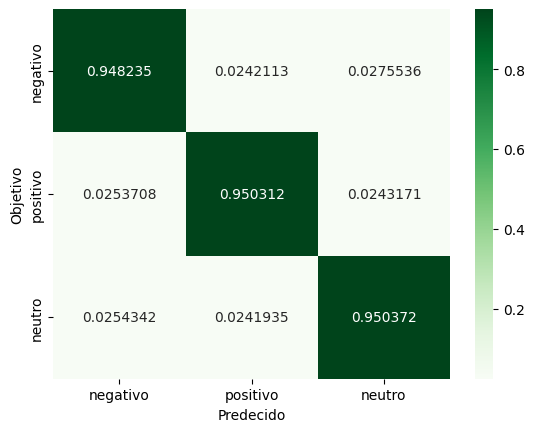

In [52]:
color = 'Greens'  #coolwarm / viridis / Blues / Greens / Reds / magma / cividis
plot_conf_matrix(conf_matrix_train, color)

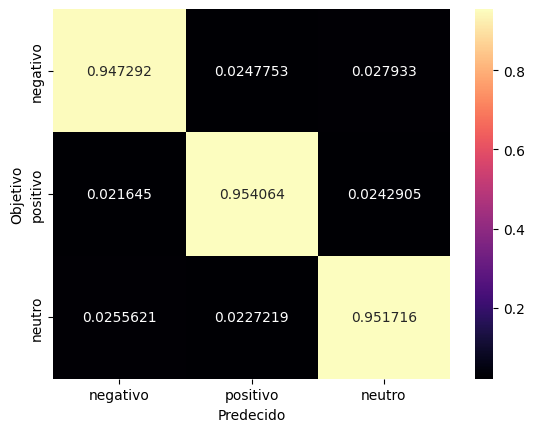

In [53]:
color = 'magma'
plot_conf_matrix(conf_matrix_test, color)

## Análisis de las palabras

In [54]:
# vectorización de palabras
word_index_map = vectorizer.vocabulary_
dict(itertools.islice(word_index_map.items(), 5))

{'interesante': 61, 'pero': 87, 'me': 69, 'gustaría': 51, 'más': 76}

In [55]:
# Coeficiente de las palabras
model.coef_[0].max()

2.1007847353587525

In [67]:
limit = 1.5
print('**Palabras más negativas**\n')
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > limit:
        print(word, weight)

**Palabras más negativas**

no 1.5109386310454178
esto 2.1007847353587525
decepcionó 1.8484200261758081
este 1.8484200261758081
sentido 1.9737735487852108
malísima 1.6576414288486296
sigan 1.6576414288486296


In [69]:
limit = 1.1
print('**Palabras más positivas**\n')
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -limit:
        print(word, weight)

**Palabras más positivas**

pero -1.1952465233388108
buenísima -1.2596535749701068
probaré -1.2596535749701068
excelente -1.1692834161609396
al -1.1574146905115645
respecto -1.1574146905115645


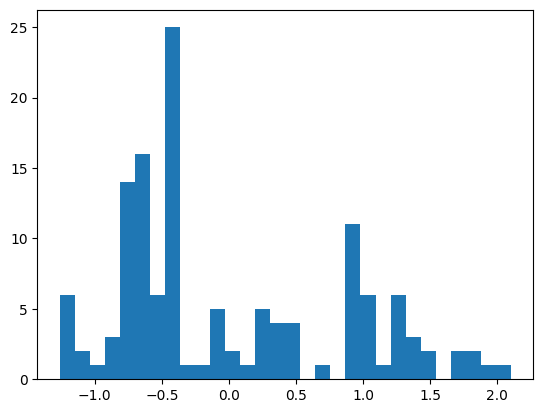

In [70]:
# Gráfico de pesos
plt.hist(model.coef_[0], bins=30)
plt.show()

## Probamos el modelo

In [71]:
prueba = ['estuvo muy entretenida la película',
          'estuvo horrible la película, me aburrí mucho',
         'no la recomiendo']

In [72]:
# Vectorizamos la prueba
x = vectorizer.transform(prueba)
x

<3x132 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [73]:
# Predecimos con el modelo
P = model.predict(x)

In [74]:
# Obtenemos las clases del modelo
clases = model.classes_

In [76]:
# Mostramos la clase de la prueba
for i in range(len(prueba)):
    if clases[P[i]] == 0:
        print(f'El comentario "{prueba[i]}" es Negativo')
    elif clases[P[i]] == 2:
        print(f'El comentario "{prueba[i]}" es Neutro')
    else:
        print(f'El comentario "{prueba[i]}" es Positivo')

El comentario "estuvo muy entretenida la película" es Positivo
El comentario "estuvo horrible la película, me aburrí mucho" es Positivo
El comentario "no la recomiendo" es Negativo


## Conclusiones

<div style="text-align: center;">
    <p>Se realizó un modelo basado en datos de comentarios en redes sociales, obteniendo resultados diferentes pero con alta probabilidad de clasificación. Esto permite identificar que la función Softmax permiten realizar un óptimo proceso para separar y reconocer sentimientos positivos y negativos y de otras características..</p>
    <hr/>
    <p style="text-align: right;">Mg. Luis Felipe Bustamante Narváez</p>
</div>